## Apple stock: Univariate time series analysis

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [3]:
#stock_c

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,138.210007,143.070007,137.690002,142.449997,142.449997,114311700
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100


In [6]:
len(stock_o)

10545

## Q1

### Q1.1, How many trading days this data set cover?

In [7]:
len(stock_o.index)

10545

### Q1.2, What's the open price at 2020-08-28?

In [8]:
stock_o['2020-08-28'] #Using slicing

126.012497

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)?

In [9]:
mean_q1_2018 = (stock_c['2018-01-01':'2018-04-01']).mean()
mean_q1_2018

43.04782798360656

In [10]:
stock_c['2018-01-01':'2018-03-31']

Date
2018-01-02    43.064999
2018-01-03    43.057499
2018-01-04    43.257500
2018-01-05    43.750000
2018-01-08    43.587502
                ...    
2018-03-23    41.235001
2018-03-26    43.192501
2018-03-27    42.084999
2018-03-28    41.619999
2018-03-29    41.945000
Name: Close, Length: 61, dtype: float64

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top.

In [11]:
value_change = abs(stock_h - stock_l) # Value change can be positive or negative so to assess highest change, used abs
value_change.nlargest(5)

Date
2020-09-04    12.809998
2020-09-02    10.979996
2022-02-24    10.850006
2021-12-16    10.389999
2022-05-11     9.639999
dtype: float64

### Q1.5, Plot the closing price vs date graph.

<AxesSubplot:xlabel='Date'>

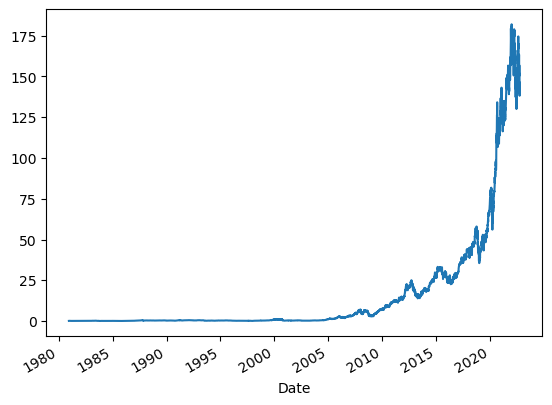

In [12]:
stock_c.plot()

### Q1.6, Plot the closing price vs date graph from the beginning of 2020 till most recent date.

<AxesSubplot:xlabel='Date'>

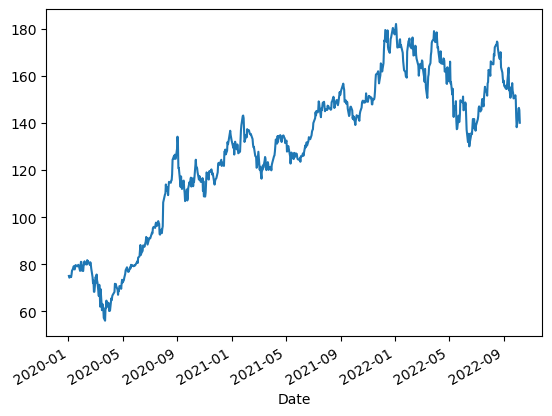

In [13]:
stock_c['2020-01-01':].plot() 

## Q2

### Q2.1, Total how many trading days the stock price close at above 50 dollars ?

In [14]:
stock_c[stock_c.values >50]
#len(stock_c[stock_c.values >50])

Date
2018-08-01     50.375000
2018-08-02     51.847500
2018-08-03     51.997501
2018-08-06     52.267502
2018-08-07     51.777500
                 ...    
2022-10-03    142.449997
2022-10-04    146.100006
2022-10-05    146.399994
2022-10-06    145.429993
2022-10-07    140.089996
Name: Close, Length: 913, dtype: float64

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only.

In [15]:
stock_c_greaterthan50 = stock_c[stock_c.values>50]
stock_c_greaterthan50.head(1).index[0]

Timestamp('2018-08-01 00:00:00')

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares(100,000,000).

In [16]:
v_Higherthan100m = stock_v[stock_v.values>100000000] #Filters data when volume > 100 million shares
#v_Higherthan100m
len(v_Higherthan100m)

8754

In [17]:
vgreaterthan100_cPricegreaterthan50 = data[(stock_c.values>50) & (stock_v.values>100000000)]
#vgreaterthan100_cPricegreaterthan50
len(vgreaterthan100_cPricegreaterthan50)

457

## Q3

### Q3.1, For dates with price close at more than 45 dollars, how many days are before 2018-05-10 ? Show the date and stock price.

In [18]:
c_greaterthan45 = stock_c[stock_c.values>45]   #Filters closing price greater than $45
c_greaterthan45[:'2018-05-09']
len(c_greaterthan45[:'2018-05-09'])


Date
2018-03-12    45.430000
2018-05-04    45.957500
2018-05-07    46.290001
2018-05-08    46.512501
2018-05-09    46.840000
Name: Close, dtype: float64

5

### Q3.2, Show the top 5 trading volume(date and volume) for stock closing price over 100 dollars.

In [19]:
cgreaterthan100 = data[(stock_c.values>100)]
cgreaterthan100['Volume'].nlargest()

Date
2020-07-31    374336800
2020-08-24    345937600
2020-08-21    338054800
2020-09-04    332607200
2020-08-03    308151200
Name: Volume, dtype: int64

### Q3.3, Based on top 5 trading volume dates for stock closing price over 100 dollars, find the matching closing price and sort them based on price, highest one on top.

In [20]:
cgreaterthan100 = data[(stock_c.values>100)]
highest5_volume = cgreaterthan100.nlargest(5 ,'Volume')['Close'].sort_values(ascending=False)
highest5_volume

Date
2020-08-24    125.857498
2020-08-21    124.370003
2020-09-04    120.959999
2020-08-03    108.937500
2020-07-31    106.260002
Name: Close, dtype: float64

### Q3.4, Based on top 5 trading volume dates for stock closing price over 100 dollars, which date it gains the most money per share? Assuming buy at open and sell at close.

In [21]:
top5dates = highest5_volume.index
mostEarningPerShare = (stock_c[top5dates] - stock_o[top5dates]).nlargest()
mostEarningPerShare

Date
2020-08-21    5.107506
2020-07-31    3.375000
2020-09-04    0.889999
2020-08-03    0.737503
2020-08-24   -2.839997
dtype: float64